<a target="_blank" href="https://colab.research.google.com/github/mrdbourke/learn-huggingface/blob/main/notebooks/hugging_face_text_classification_tutorial.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# Next:
# Add tools used in this overview (e.g. overview of the project)
# Create a small dataset with text generation, e.g. 50x spam/not_spam emails and train a classifier on it ✅
   # Done, see notebook: https://colab.research.google.com/drive/14xr3KN_HINY5LjV0s2E-4i7v0o_XI3U8?usp=sharing 
# Save the dataset to Hugging Face Datasets ✅
   # Done, see dataset: https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions
# Train a classifier on it ✅
# Save the model to the Hugging Face Model Hub ✅
# Create a with Gradio and test the model in the wild ✅ 

## TK - Overview

### TK - What we're going to build

In this project, we're going to learn various aspects of the Hugging Face ecosystem whilst building a text classification model.

To keep things as practical as possible, we're going to be bulding a `food`/`not_food` text classification model. 

Given a piece of a text, our model will be able to predict if it's about food or not.

This is the same kind of model I use in my own work on [Nutrify](https://www.nutrify.app) (an app to help people learn about food).

More specifically, we're going to follow the following steps:

1. **Problem defintion and dataset preparation** - Getting a dataset/setting up the problem space.
2. **Finding, training and evaluating a model** - Finding a text classification model suitable for our problem on Hugging Face and customizing it to our own dataset.
3. **Creating a demo and put our model into the real world** - Sharing our trained model in a way others can access and use.

By the end of this project, you'll have a trained model and [demo on Hugging Face](https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo) you can share with others.

TK image - see the finished product (demo)

::: {.callout-note}
Note this is a hands-on project, so we'll be focused on writing reusable code and building a model that can be used in the real world. If you are looking for explainers to the theory of what we're doing, I'll leave links in the extra-curriculum section.
::: 




### TK - What is Hugging Face?

Hugging Face is a platform that offers access to many different kinds of open-source machine learning models and datasets.

They're also the creators of the popular `transformers` library which is a Python-based library for working with pre-trained models as well as custom models and datasets.

If you're getting into the world of AI and machine learning, you're going to come across Hugging Face.





### TK - Why Hugging Face?

Many of the biggest companies in the world use Hugging Face for their open-source machine learning projects including [Apple](https://huggingface.co/apple), [Google](https://huggingface.co/google), [Facebook](https://huggingface.co/facebook) (Meta), [Microsoft](https://huggingface.co/microsoft), [OpenAI](https://huggingface.co/openai), [ByteDance](https://huggingface.co/ByteDance) and more.

TK image - image of people using Hugging Face

Not only does Hugging Face make it so you can use state-of-the-art machine learning models such as [Stable Diffusion](https://huggingface.co/stabilityai/stable-diffusion-2-1) (for image generation) and [Whipser](https://huggingface.co/openai/whisper-large-v3) (for audio transcription) easily, it also makes it so you can share your own models, datasets and resources.

Consider Hugging Face the homepage of your AI/machine learning profile.


### TK - What is text classification?

Text classification is the process of assigning a category to a piece of text.

Where a category can be almost anything and a piece of text can be a word, phrase, sentence, paragraph or entire document.

TK image - example of text classification

Example text classification problems include:

| **Problem** | **Description** | **Problem Type** |
|-----|-----|-----|
| Spam email detection | Is an email spam or not spam? | Binary classification (one thing or another) |
| Sentiment analysis | Is a piece of text positive, negative or neutral? | Multi-class classification (one thing from many) |
| Language detection | What language is a piece of text written in? | Multi-class classification (one thing from many) |
| Topic classification | What topic(s) does a news article belong to? | Multi-label classification (one or more things from many) |
| Hate speech detection | Is a comment hateful or not hateful? | Binary classification (one thing or another) |
| Product categorization | What categories does a product belong to? | Multi-label classification (one or more things from many) |

There are several different kinds of models you can use for text classification.

And each will have its pros and cons depending on the problem you're working on.

Example text classification models include:

| **Model** | **Description** | **Pros** | **Cons** |
|-----|-----|-----|-----|
| Rule-based | Uses a set of rules to classify text (e.g. if text contains "sad" -> sentiment = low) | Simple, easy to understand | Requires manual creation of rules |
| [Bag of Words](https://en.wikipedia.org/wiki/Bag-of-words_model) | Counts the frequency of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) | Weighs the importance of words in a piece of text | Simple, easy to understand | Doesn't capture word order |
| Deep learning-based models | Uses neural networks to learn patterns in text | Can learn complex patterns at scale | Can require large amounts of data/compute power to run, not as easy to understand (can be hard to debug) |

We're going to use a deep learning model our case.

Why?

Because Hugging Face helps us do so.

And in most cases, with a large enough dataset, a deep learning model will often perform better than a rule-based or other model.


### TK - Why train your own text classification models?

You can use pre-trained models for text classification as well as API-powered models and LLMs such as GPT-4 or Gemini.

However, it's often a good idea to train your own text classification models for a few reasons:

* They can be much faster than API-powered models (since they're running on your own hardware, this can save on costs and time).
* They're customized to your own data.
* They don't require you to send your data elsewhere (privacy).
* If a service goes down, you'll still have access to your model (reliability).

TK image - example of training your own model vs using an API-powered model


## TK - Importing necessary libraries

* Tk - getting setup on Google Colab (if you're using it)
* TK - Write code so that this example works on Google Colab
* TK - e.g. import/install required libraries 

In [1]:
try:
  import datasets, evaluate, accelerate
except:
  !pip install -U datasets, evaluate, accelerate
  import datasets, evaluate, accelerate

import os
import random

import numpy as np
import pandas as pd

import torch
import transformers

from datasets import Dataset

## TK - Getting a dataset

* TK - show how this dataset was created (add the notebook for creating a dataset - this will be required for future tutorials)
    * This way people can see how to create their own datasets 
* TK image - show an image of example text dataset
* TK - where to get datasets? see: https://huggingface.co/datasets 

* TK - see dataset creation: 
   * Done, see notebook: https://colab.research.google.com/drive/14xr3KN_HINY5LjV0s2E-4i7v0o_XI3U8?usp=sharing 
   * Done, see dataset: https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions

In [19]:
# Load the dataset
dataset = datasets.load_dataset("mrdbourke/learn_hf_food_not_food_image_captions")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 250
    })
})

### TK - Inspect random examples from the dataset

* TK - always spend time with your data, when interacting with a new dataset, view random examples for ~10 minutes or at least 20-100 random examples to get a feel of the data

In [20]:
import random

random_indexs = random.sample(range(len(dataset["train"])), 5)
random_samples = dataset["train"][random_indexs]

print(f"[INFO] Random samples from dataset:\n")
for item in zip(random_samples["text"], random_samples["label"]):
    print(f"Text: {item[0]} | Label: {item[1]}")

[INFO] Random samples from dataset:

Text: A slice of veggie pizza loaded with colorful and nutritious vegetables | Label: food
Text: Working from home at her desk, a woman deals with a cat sitting on the keyboard | Label: not_food
Text: Two people sitting at a dining room table with a newspaper on it | Label: not_food
Text: Sushi platter showcasing a variety of colorful rolls and garnishes. | Label: food
Text: Drone resting on a desk | Label: not_food


## TK - Preparing data for text classification

See docs: https://huggingface.co/docs/transformers/en/tasks/sequence_classification#preprocess

In [21]:
# Create mapping from id2label and label2id
id2label = {0: "not_food", 1: "food"}
label2id = {"not_food": 0, "food": 1}

In [22]:
# Turn labels into 0 or 1 (e.g. 0 for "not_food", 1 for "food"), see: https://huggingface.co/docs/datasets/en/process#map
def map_labels_to_number(example):
  example["label"] = label2id[example["label"]]
  return example

dataset = dataset["train"].map(map_labels_to_number)
dataset[:5]

{'text': ['Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
  'Set of books stacked on a desk',
  'Watching TV together, a family has their dog stretched out on the floor',
  'Wooden dresser with a mirror reflecting the room',
  'Lawn mower stored in a shed'],
 'label': [1, 0, 0, 0, 0]}

In [23]:
dataset.shuffle()[:5]

{'text': ["King-size bed with a white comforter inviting a good night's sleep",
  'A slice of pizza with a spicy kick, featuring jalapeno peppers',
  'Red brick fireplace with a mantel serving as a centerpiece',
  'Creamy spinach and potato curry, featuring fluffy potatoes and nutritious spinach in a rich sauce with cream and garam masala.',
  'Set of cookie cutters collected in a jar'],
 'label': [0, 1, 0, 1, 0]}

### TK - Split the dataset into training and test sets

In [24]:
# Create train/test splits, see: https://huggingface.co/docs/datasets/en/process#split
dataset = dataset.train_test_split(test_size=0.2, seed=42) # note: seed isn't needed, just here for reproducibility, without it you will get different splits each time you run the cell
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
})

In [27]:
random_idx_train = random.randint(0, len(dataset["train"]))
random_sample_train = dataset["train"][random_idx_train]

random_idx_test = random.randint(0, len(dataset["test"]))
random_sample_test = dataset["test"][random_idx_test]

print(f"[INFO] Random sample from training dataset:")
print(f"Text: {random_sample_train['text']} | Label: {random_sample_train['label']} ({id2label[random_sample_train['label']]})\n")
print(f"[INFO] Random sample from testing dataset:")
print(f"Text: {random_sample_test['text']} | Label: {random_sample_test['label']} ({id2label[random_sample_test['label']]})")

[INFO] Random sample from training dataset:
Text: Pizza with a unique topping combination of pineapple and ham | Label: 1 (food)

[INFO] Random sample from testing dataset:
Text: Tangy tomato curry with chicken, featuring tender chicken pieces in a zesty tomato-based sauce with onions and spices. | Label: 1 (food)


### TK - Tokenizing text data

* TK - what is tokenization? E.g. turning data from text to numbers (machines like numbers)
* TK - see OpenAI guide on tokenization: https://openai.com/tokenization/

In [28]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

def preprocess_function(examples):
  return tokenizer(examples["text"], truncation=True)

/home/daniel/miniconda3/envs/ai/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [29]:
tokenized_dataset = dataset.map(preprocess_function, batched=True)
tokenized_dataset

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})

In [30]:
tokenized_dataset["train"][0], tokenized_dataset["test"][0]

({'text': 'Set of headphones placed on a desk',
  'label': 0,
  'input_ids': [101, 2275, 1997, 2132, 19093, 2872, 2006, 1037, 4624, 102],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]},
 {'text': 'A slice of pepperoni pizza with a layer of melted cheese',
  'label': 1,
  'input_ids': [101,
   1037,
   14704,
   1997,
   11565,
   10698,
   10733,
   2007,
   1037,
   6741,
   1997,
   12501,
   8808,
   102],
  'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]})

### TK - Make sure all text is the same length

In [31]:
# Collate examples and pad them each batch
# TK - this is not 100% needed as the tokenizer can handle padding, but it's good to know how to do it
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer,
                                        padding=True)
data_collator

DataCollatorWithPadding(tokenizer=DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}, padding=True, max_length=None, pad_to_multiple_of=None, return_tensor

## TK - Setup Evaluation Metric

* TK - What evaluation metrics are there?

See: https://huggingface.co/docs/transformers/en/tasks/sequence_classification#evaluate

In [104]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

## TK - Training our model

See: https://huggingface.co/docs/transformers/en/tasks/sequence_classification#train

Steps for training:

1. Define model
2. Define training arguments
3. Pass training arguments to Trainer
4. Call `train()`

* TK - What kind of training are we doing? Supervised learning + fine-tuning an existing model

In [42]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
    num_labels=2, # can customize this to the number of classes in your dataset
    id2label=id2label,
    label2id=label2id
)

/home/daniel/miniconda3/envs/ai/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


* TK - notice this output on pretraining advice

> Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
> You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

Let's try and make a prediction with our model and see what happens.

In [43]:
# Try and make a prediction with the loaded model (this will error)
model(**tokenized_dataset["train"][:2])

TypeError: DistilBertForSequenceClassification.forward() got an unexpected keyword argument 'text'

### TK - Create a directory for saving models

In [44]:
# Create model output directory
from pathlib import Path

# Create models directory
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Create model save name
model_save_name = "learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Create model save path
model_save_dir = Path(models_dir, model_save_name)

model_save_dir

PosixPath('models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased')

### TK - Setup training arguments

* TK - add markdown table of different parameters and what they do (e.g. most of the common ones but add a note that these may want to be changed depending on the problem + there are many more in the docs)

In [45]:
# Create training arguments
# See: https://huggingface.co/docs/transformers/v4.40.2/en/main_classes/trainer#transformers.TrainingArguments
# TODO: Turn off Weights & Biases logging? Or add it in?
# TK - exercise: spend 10 minutes reading the TrainingArguments documentation
training_args = TrainingArguments(
    output_dir=model_save_dir, # TODO: change this path to model save path, e.g. 'learn_hf_food_not_food_text_classifier_model' 
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True, # load the best model when finished training
    logging_strategy="epoch", # log training results every epoch
    report_to="none" # optional: log experiments to Weights & Biases/other similar experimenting tracking services (we'll turn this off for now) 
    # push_to_hub=True # optional: automatically upload the model to the Hub (we'll do this manually later on)
    # hub_token="your_token_here" # optional: add your Hugging Face Hub token to push to the Hub (will default to huggingface-cli login)
)

### TK - Setup trainer class

In [46]:
# Setup Trainer
# Note: Trainer applies dynamic padding by default when you pass `tokenizer` to it.
# In this case, you don't need to specify a data collator explicitly.
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    #data_collator=data_collator, # not necessary if using pre-built tokenizer padding (default)
    compute_metrics=compute_metrics
)

### TK - Train the model

In [47]:
results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.615200,0.450918,1.000000
2,0.405600,0.257541,1.000000
3,0.219900,0.123121,1.000000
4,0.108100,0.062602,1.000000
5,0.056800,0.036242,1.000000
6,0.035900,0.025235,1.000000
7,0.026700,0.019986,1.000000
8,0.021900,0.017336,1.000000
9,0.019400,0.016042,1.000000
10,0.018200,0.015633,1.000000


### TK - Inspect the model results

In [82]:
# TK - go through these
total_train_time = results.metrics["train_runtime"]
train_samples_per_second = results.metrics["train_samples_per_second"]

print(f"Total training time: {total_train_time} seconds")
print(f"Training samples per second: {train_samples_per_second}")

Total training time: 6.7168 seconds
Training samples per second: 297.761


In [83]:
# TK - get loss curves
trainer_history = trainer.state.log_history[:-1]
trainer_training_time = trainer_history[-1]
trainer_history[:5]

[{'loss': 0.6152,
  'grad_norm': 3.3377952575683594,
  'learning_rate': 1.8e-05,
  'epoch': 1.0,
  'step': 7},
 {'eval_loss': 0.45091766119003296,
  'eval_accuracy': 1.0,
  'eval_runtime': 0.0113,
  'eval_samples_per_second': 4423.998,
  'eval_steps_per_second': 176.96,
  'epoch': 1.0,
  'step': 7},
 {'loss': 0.4056,
  'grad_norm': 2.4789676666259766,
  'learning_rate': 1.6000000000000003e-05,
  'epoch': 2.0,
  'step': 14},
 {'eval_loss': 0.25754112005233765,
  'eval_accuracy': 1.0,
  'eval_runtime': 0.0124,
  'eval_samples_per_second': 4023.931,
  'eval_steps_per_second': 160.957,
  'epoch': 2.0,
  'step': 14},
 {'loss': 0.2199,
  'grad_norm': 1.6385667324066162,
  'learning_rate': 1.4e-05,
  'epoch': 3.0,
  'step': 21}]

In [84]:
# Extract training and evaluation metrics
trainer_history_training_set = []
trainer_history_eval_set = []

for item in trainer_history[:-1]:
    item_keys = list(item.keys())
    if any("eval" in item for item in item_keys):
        trainer_history_eval_set.append(item)
    else:
        trainer_history_training_set.append(item)

In [85]:
trainer_history_training_df = pd.DataFrame(trainer_history_training_set)
trainer_history_eval_df = pd.DataFrame(trainer_history_eval_set)

trainer_history_training_df

,loss,grad_norm,learning_rate,epoch,step
0,0.6152,3.337795,0.000018,1.0,7
1,0.4056,2.478968,0.000016,2.0,14
2,0.2199,1.638567,0.000014,3.0,21
3,0.1081,0.902428,0.000012,4.0,28
4,0.0568,0.546689,0.000010,5.0,35
5,0.0359,0.347724,0.000008,6.0,42
6,0.0267,0.309794,0.000006,7.0,49
7,0.0219,0.273363,0.000004,8.0,56
8,0.0194,0.244860,0.000002,9.0,63
9,0.0182,0.245236,0.000000,10.0,70


In [86]:
trainer_history_eval_df

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step
0,0.450918,1.0,0.0113,4423.998,176.960,1.0,7
1,0.257541,1.0,0.0124,4023.931,160.957,2.0,14
2,0.123121,1.0,0.0115,4338.068,173.523,3.0,21
3,0.062602,1.0,0.0115,4349.855,173.994,4.0,28
4,0.036242,1.0,0.0112,4448.585,177.943,5.0,35
5,0.025235,1.0,0.0122,4100.485,164.019,6.0,42
6,0.019986,1.0,0.0116,4327.147,173.086,7.0,49
7,0.017336,1.0,0.0113,4406.522,176.261,8.0,56
8,0.016042,1.0,0.0116,4315.128,172.605,9.0,63


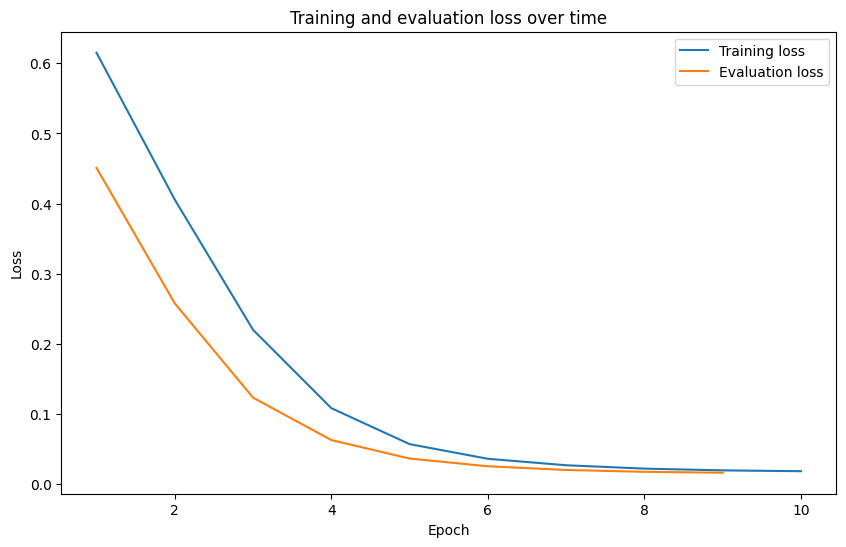

In [88]:
# Plot training and evaluation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(trainer_history_training_df["epoch"], trainer_history_training_df["loss"], label="Training loss")
plt.plot(trainer_history_eval_df["epoch"], trainer_history_eval_df["eval_loss"], label="Evaluation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and evaluation loss over time")
plt.legend()
plt.show()

### TK - Save the model for later use

In [78]:
# Save model
# See docs: https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.Trainer.save_model 
trainer.save_model(model_save_dir)

### TK - Push the model to Hugging Face Hub

TK - optional to share the model/use elsewhere 

* see here: https://huggingface.co/docs/transformers/en/model_sharing 
* also see here for how to setup `huggingface-cli` so you can write your model to your account

In [79]:
# TK - have a note here for the errors
# Note: you may see the following error
# 403 Forbidden: You don't have the rights to create a model under the namespace "mrdbourke".
# Cannot access content at: https://huggingface.co/api/repos/create.
# If you are trying to create or update content,make sure you have a token with the `write` role.

In [80]:
# TK - Push model to hub (for later re-use)
# TODO: Push this model to the hub to be able to use it later
# TK - this requires a "write" token from the Hugging Face Hub
# TK - see docs: https://huggingface.co/docs/transformers/en/main_classes/trainer#transformers.Trainer.push_to_hub 
# TK - for example, on my local computer, my token is saved to: "/home/daniel/.cache/huggingface/token"

# TK - Can create a model card with create_model_card()
# see here: https://huggingface.co/docs/transformers/v4.41.3/en/main_classes/trainer#transformers.Trainer.create_model_card 

trainer.push_to_hub(
    commit_message="Uploading food not food text classifier model" # set to False if you want the model to be public
    # token="YOUR_HF_TOKEN_HERE" # note: this will default to the token you have saved in your Hugging Face config
)

CommitInfo(commit_url='https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased/commit/7c9a4a6b17da981559f484538d51f6ff9a14c12d', commit_message='Uploading food not food text classifier model', commit_description='', oid='7c9a4a6b17da981559f484538d51f6ff9a14c12d', pr_url=None, pr_revision=None, pr_num=None)

* TK - note: this will make the model public, to make it private, 

See the model here saved for later: https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased 

### TK - Make and evaluate predictions on the test set

In [108]:
# Perform predictions on the test set
predictions_all = trainer.predict(tokenized_dataset["test"])
prediction_metrics = predictions_all.metrics
prediction_metrics

{'test_loss': 0.015632618218660355,
 'test_accuracy': 1.0,
 'test_runtime': 0.0391,
 'test_samples_per_second': 1280.07,
 'test_steps_per_second': 51.203}

In [113]:
predictions_all

PredictionOutput(predictions=array([[-2.261428 ,  1.890655 ],
       [ 1.8613493, -1.8532594],
       [-2.2970695,  1.9171791],
       [ 2.187019 , -2.1593657],
       [ 2.1193414, -2.1615388],
       [-2.2868803,  1.9454829],
       [ 2.0827348, -2.1099336],
       [ 2.154141 , -2.1266923],
       [-2.279855 ,  1.9362432],
       [-2.277952 ,  1.9518106],
       [-2.2772808,  1.9423369],
       [-1.9777709,  1.5732591],
       [ 2.1512635, -2.0508409],
       [-2.3032587,  1.9534686],
       [-2.138177 ,  1.7531359],
       [ 2.194142 , -2.1277084],
       [-2.2709608,  1.9498663],
       [ 1.9596925, -1.919577 ],
       [-2.2827635,  1.9249418],
       [-2.290854 ,  1.9592198],
       [-2.2823153,  1.8799024],
       [-2.3003585,  1.9387653],
       [ 2.043029 , -2.0384376],
       [ 2.0885575, -2.1244206],
       [-2.2873669,  1.9443382],
       [-2.2972584,  1.9009027],
       [-2.2450745,  1.8596792],
       [ 2.1050394, -2.040059 ],
       [-2.2972147,  1.8946056],
       [ 2.130

In [112]:
predictions_all._asdict().keys()

dict_keys(['predictions', 'label_ids', 'metrics'])

In [100]:
import torch
pred_probs = torch.softmax(torch.tensor(predictions_all.predictions), dim=1)
pred_labels = np.argmax(predictions_all.predictions, axis=1)
true_labels = dataset["test"]["label"]

# Calculate accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(true_labels, pred_labels)
accuracy

1.0

In [120]:
# Make a DataFrame of test predictions
test_predictions_df = pd.DataFrame({
    "text": dataset["test"]["text"],
    "true_label": true_labels,
    "pred_label": pred_labels,
    "pred_prob": torch.max(pred_probs, dim=1).values
})

test_predictions_df.head()

,text,true_label,pred_label,pred_prob
0,A slice of pepperoni pizza with a layer of mel...,1,1,0.984512
1,Red brick fireplace with a mantel serving as a...,0,0,0.976215
2,A bowl of sliced bell peppers with a sprinkle ...,1,1,0.985432
3,Set of mugs hanging on a hook,0,0,0.987212
4,Standing floor lamp providing light next to an...,0,0,0.986358


In [121]:
# Show 10 examples with low prediction probability
# TK - this is good to find samples where the model is unsure 
test_predictions_df.sort_values("pred_prob").head(10)

,text,true_label,pred_label,pred_prob
11,A close-up shot of a cheesy pizza slice being ...,1,1,0.972105
1,Red brick fireplace with a mantel serving as a...,0,0,0.976215
42,"Boxes of apples, pears, pineapple, manadrins a...",1,1,0.978392
17,"Relaxing on the porch, a couple enjoys the com...",0,0,0.979753
14,Two handfuls of bananas in a fruit bowl with g...,1,1,0.979990
40,A bowl of cherries with a sprig of mint for ga...,1,1,0.981236
39,A close-up of a woman practicing yoga in the l...,0,0,0.981741
43,Set of muffin tins stacked together,0,0,0.982799
22,Two people sitting at a dining room table with...,0,0,0.983398
26,A fruit platter with a variety of exotic fruit...,1,1,0.983774


## TK - Make and inspect predictions on new text data

UPTOHERE
- load the model (locally + from Hub)
    - make sure to change the save paths when loading the model to the new paths
- make predictions on new text data
- build a demo with Gradio (optional)

Making predictions on our own text options.

See: https://huggingface.co/docs/transformers/en/tasks/sequence_classification#inference

In [124]:
model_save_dir

PosixPath('models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased')

In [144]:
# Setup local model path
local_model_path = "models/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

# Setup Hugging Face model path (see: https://huggingface.co/mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased)
huggingface_model_path = "mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased"

### TK - Pipeline mode

* Tk - what is a pipeline?

In [145]:
# TODO: TK - set device agnostic code for CUDA/Mac/CPU?
def set_device():
    """
    Set device to CUDA if available, else MPS (Mac), else CPU.

    This defaults to using the best available device (usually).
    """
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    return device

DEVICE = set_device()
print(f"[INFO] Using device: {DEVICE}")

[INFO] Using device: cuda


In [146]:
import torch
from transformers import pipeline

# Setup batch size for batched inference (can be adjusted depending on how much memory is available)
# TK - why use batch size? -> multiple samples at inference = faster
BATCH_SIZE = 64

food_not_food_classifier = pipeline(task="text-classification", 
                                    model=local_model_path,
                                    batch_size=BATCH_SIZE,
                                    device=DEVICE)


In [147]:
sample_text_food = "A delicious photo of a plate of scrambled eggs, bacon and toast"
food_not_food_classifier(sample_text_food)

[{'label': 'food', 'score': 0.99871826171875}]

In [148]:
sample_text_not_food = "A yellow tractor driving over the hill"
food_not_food_classifier(sample_text_not_food)

[{'label': 'not_food', 'score': 0.9989410042762756}]

In [150]:
# Pipeline also works with remote models (will have to laod the model locally first)
food_not_food_classifier_remote = pipeline(task="text-classification", 
                                           model=huggingface_model_path,
                                           batch_size=BATCH_SIZE,
                                           device=DEVICE)

food_not_food_classifier_remote("This is some new text about bananas and pancakes and ice cream")

[{'label': 'food', 'score': 0.9981549382209778}]

### TK - Batch prediction

* TK - what is batch prediction?

In [151]:
# Predicting works with lists
# Can find the examples with highest confidence and keep those
sentences = [
    "I whipped up a fresh batch of code, but it seems to have a syntax error.",
    "We need to marinate these ideas overnight before presenting them to the client.",
    "The new software is definitely a spicy upgrade, taking some time to get used to.",
    "Her social media post was the perfect recipe for a viral sensation.",
    "He served up a rebuttal full of facts, leaving his opponent speechless.",
    "The team needs to simmer down a bit before tackling the next challenge.",
    "Our budget is a bit thin, so we'll have to use budget-friendly materials for this project.",
    "The presentation was a delicious blend of humor and information, keeping the audience engaged.",
    "Daniel Bourke is really cool :D",
    "My favoruite food is biltong!"
]

food_not_food_classifier(sentences)

[{'label': 'not_food', 'score': 0.9410305619239807},
 {'label': 'not_food', 'score': 0.9650871753692627},
 {'label': 'not_food', 'score': 0.9215793609619141},
 {'label': 'not_food', 'score': 0.9115400910377502},
 {'label': 'not_food', 'score': 0.9625208377838135},
 {'label': 'not_food', 'score': 0.9476941823959351},
 {'label': 'not_food', 'score': 0.9451109170913696},
 {'label': 'not_food', 'score': 0.9027702808380127},
 {'label': 'not_food', 'score': 0.9954429864883423},
 {'label': 'food', 'score': 0.7653573155403137}]

### TK - Time our model across larger sample sizes

* TK - our model is fast!

In [142]:
%%time
import time
for i in [10, 100, 1000, 10_000]:
    sentences_big = sentences * i
    print(f"[INFO] Number of sentences: {len(sentences_big)}")

    start_time = time.time()
    food_not_food_classifier(sentences_big)
    end_time = time.time()

    print(f"[INFO] Inference time for {len(sentences_big)} sentences: {round(end_time - start_time, 5)} seconds.")
    print(f"[INFO] Avg inference time per sentence: {round((end_time - start_time) / len(sentences_big), 8)} seconds.")
    print()

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[INFO] Number of sentences: 100
[INFO] Inference time for 100 sentences: 0.07726 seconds.
[INFO] Avg inference time per sentence: 0.0007726 seconds.

[INFO] Number of sentences: 1000
[INFO] Inference time for 1000 sentences: 0.32344 seconds.
[INFO] Avg inference time per sentence: 0.00032344 seconds.

[INFO] Number of sentences: 10000
[INFO] Inference time for 10000 sentences: 1.43834 seconds.
[INFO] Avg inference time per sentence: 0.00014383 seconds.

[INFO] Number of sentences: 100000
[INFO] Inference time for 100000 sentences: 14.4585 seconds.
[INFO] Avg inference time per sentence: 0.00014459 seconds.

CPU times: user 15.8 s, sys: 552 ms, total: 16.3 s
Wall time: 16.3 s


### PyTorch mode

In [50]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("learn_hf_food_not_food_text_classifier_model")
inputs = tokenizer(sample_text_food, return_tensors="pt")

In [53]:
import torch
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("learn_hf_food_not_food_text_classifier_model")
with torch.no_grad():
  logits = model(**inputs).logits

In [54]:
# Get predicted class
predicted_class_id = logits.argmax().item()
print(f"Text: {sample_text_food}")
print(f"Predicted label: {model.config.id2label[predicted_class_id]}")

Text: A delicious photo of a plate of scrambled eggs, bacon and toast
Predicted label: food


## TK - Turning our model into a demo

* TK - why build a demo?
    * - try our model in the wild, see samples which don't work properly, e.g. use cases we didn't think of... "pie"/"tea" (short words), "hjflasdjhfhwerr" (gibberish)
* TK - build a demo with Gradio, see it here: https://www.gradio.app/guides/quickstart 
* TK - requires `pip install gradio`

In [152]:
# Set top_k=2 to get top 2 predictions (in our case, food and not_food)
food_not_food_classifier("Testing the pipeline", top_k=2)

[{'label': 'not_food', 'score': 0.9977033734321594},
 {'label': 'food', 'score': 0.002296620048582554}]

### TK - Creating a simple function to perform inference

* TK - this is required for gradio -> output a dict of {"label_1": probability_1, "label_2": probability_2...}
* 2 options:
    * Local demo (for our own inspection)
    * Hosted demo on Hugging Face Spaces (for sharing with others)

In [160]:
import gradio as gr

def food_not_food_classifier(text):
    food_not_food_classifier = pipeline(task="text-classification", 
                                        model=local_model_path,
                                        batch_size=64,
                                        device="cuda" if torch.cuda.is_available() else "cpu",
                                        top_k=None) # return all possible scores (not just top-1)
    
    # Get outputs from pipeline (as a list of dicts)
    outputs = food_not_food_classifier(text)[0]

    # Format output for Gradio (e.g. {"label_1": probability_1, "label_2": probability_2})
    output_dict = {}

    for item in outputs:
        output_dict[item["label"]] = item["score"]

    return output_dict

food_not_food_classifier("My lunch today was bacon and eggs")

{'food': 0.7966588139533997, 'not_food': 0.20334114134311676}

In [161]:
demo = gr.Interface(
    fn=food_not_food_classifier, 
    inputs="text", 
    outputs=gr.Label(num_top_classes=2), # show top 2 classes (that's all we have)
    title="Food or Not Food Classifier",
    description="A text classifier to determine if a sentence is about food or not food.",
    examples=[["I whipped up a fresh batch of code, but it seems to have a syntax error."],
              ["A delicious photo of a plate of scrambled eggs, bacon and toast."]])

demo.launch()

Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


### TK - Uploading/running the demo

Options:
* Uploading manually to Hugging Face Spaces - hf.co/new-space 
* Uploading programmatically to Hugging Face Spaces - https://www.gradio.app/guides/using-hugging-face-integrations#hosting-your-gradio-demos-on-spaces
* Running the demo locally - `Interface.launch()` (only works if you have Gradio installed)


In [162]:
# Make a directory for demos
demos_dir = Path("../demos")
demos_dir.mkdir(exist_ok=True)

# Create a folder for the food_not_food_text_classifer demo
food_not_food_text_classifier_demo_dir = Path(demos_dir, "food_not_food_text_classifier")
food_not_food_text_classifier_demo_dir.mkdir(exist_ok=True)

In [164]:
%%writefile ../demos/food_not_food_text_classifier/app.py
import torch
import gradio as gr

from transformers import pipeline

def food_not_food_classifier(text):
    # Set up text classification pipeline
    food_not_food_classifier = pipeline(task="text-classification", 
                                        model="mrdbourke/learn_hf_food_not_food_text_classifier-distilbert-base-uncased", # link to model on HF Hub
                                        device="cuda" if torch.cuda.is_available() else "cpu",
                                        top_k=None) # return all possible scores (not just top-1)
    
    # Get outputs from pipeline (as a list of dicts)
    outputs = food_not_food_classifier(text)[0]

    # Format output for Gradio (e.g. {"label_1": probability_1, "label_2": probability_2})
    output_dict = {}
    for item in outputs:
        output_dict[item["label"]] = item["score"]

    return output_dict

description = """
A text classifier to determine if a sentence is about food or not food.

TK - See source code:
"""

demo = gr.Interface(fn=food_not_food_classifier, 
             inputs="text", 
             outputs=gr.Label(num_top_classes=2), # show top 2 classes (that's all we have)
             title="🍗🚫🥑 Food or Not Food Text Classifier",
             description=description,
             examples=[["I whipped up a fresh batch of code, but it seems to have a syntax error."],
                       ["A delicious photo of a plate of scrambled eggs, bacon and toast."]])

if __name__ == "__main__":
    demo.launch()

Overwriting ../demos/food_not_food_text_classifier/app.py


TK - note: you will often need a requirements.txt file

```
===== Application Startup at 2024-06-13 05:37:21 =====

Traceback (most recent call last):
  File "/home/user/app/app.py", line 1, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'
```


In [165]:
%%writefile ../demos/food_not_food_text_classifier/requirements.txt
gradio
torch
transformers

Overwriting ../demos/food_not_food_text_classifier/requirements.txt


Create a `README.md` file with metadata instructions (these are specific to Hugging Face Spaces).

In [166]:
%%writefile ../demos/food_not_food_text_classifier/README.md
---
title: Food Not Food Text Classifier
emoji: 🍗🚫🥑
colorFrom: blue
colorTo: yellow
sdk: gradio
sdk_version: 4.36.1
app_file: app.py
pinned: false
license: apache-2.0
---

# 🍗🚫🥑 Food Not Food Text Classifier

Small demo to showcase a text classifier to determine if a sentence is about food or not food.

DistillBERT model fine-tuned on a small synthetic dataset of 250 generated [Food or Not Food image captions](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).

TK - see the demo notebook on how to create this

Overwriting ../demos/food_not_food_text_classifier/README.md


In [167]:
from huggingface_hub import (
    create_repo,
    get_full_repo_name,
    upload_file, # for uploading a single file
    upload_folder # for uploading multiple files (in a folder)
)

path_to_demo_folder = "../demos/food_not_food_text_classifier"
repo_type = "space" # we're creating a Hugging Face Space

# Create a repo on Hugging Face
# see docs: https://huggingface.co/docs/huggingface_hub/v0.23.3/en/package_reference/hf_api#huggingface_hub.HfApi.create_repo
target_space_name = "learn_hf_food_not_food_text_classifier_demo"
print(f"[INFO] Creating repo: {target_space_name}")
create_repo(
    repo_id=target_space_name,
    #token="YOUR_HF_TOKEN"
    private=False, # set to True if you want the repo to be private
    repo_type=repo_type, # create a Hugging Face Space
    space_sdk="gradio", # we're using Gradio to build our demo 
    exist_ok=True, # set to False if you want to create the repo even if it already exists            
)

# Get the full repo name (e.g. "mrdbourke/learn_hf_food_not_food_text_classifier_demo")
full_repo_name = get_full_repo_name(model_id=target_space_name)
print(f"[INFO] Full repo name: {full_repo_name}")

# Upload a file
# see docs: https://huggingface.co/docs/huggingface_hub/v0.23.3/en/package_reference/hf_api#huggingface_hub.HfApi.upload_file 
print(f"[INFO] Uploading {path_to_demo_folder} to repo: {full_repo_name}")
file_url = upload_folder(
    folder_path=path_to_demo_folder,
    path_in_repo=".", # save to the root of the repo
    repo_id=full_repo_name,
    repo_type=repo_type,
    #token="YOUR_HF_TOKEN"
    commit_message="Uploading food not food text classifier demo app.py"
)

[INFO] Creating repo: learn_hf_food_not_food_text_classifier_demo
[INFO] Full repo name: mrdbourke/learn_hf_food_not_food_text_classifier_demo
[INFO] Uploading ../demos/food_not_food_text_classifier to repo: mrdbourke/learn_hf_food_not_food_text_classifier_demo


* TK - see the demo link here: https://huggingface.co/spaces/mrdbourke/learn_hf_food_not_food_text_classifier_demo 

### TK - Testing the live demo

In [1]:
from IPython.display import HTML


# You can get embeddable HTML code for your demo by clicking the "Embed" button on the demo page
HTML('''
<iframe
	src="https://mrdbourke-learn-hf-food-not-food-text-classifier-demo.hf.space"
	frameborder="0"
	width="850"
	height="450"
></iframe>     
''')

## TK - Exercises and Extensions

* Where does our model fail? E.g. what kind of sentences does it struggle with? How could you fix this? 
    * Make an extra 10-50 examples of these and add them to the dataset and then retrain the model
    * See here: https://discuss.huggingface.co/t/how-do-i-add-things-rows-to-an-already-saved-dataset/27423 
* Build your own text classifier on a different dataset/your own custom dataset
* How might we make our dataset multi-class? (e.g. more than 2 classes)

## TK - Extra resources